In [2]:
%matplotlib inline
from modelclass import *
import itertools as it

# Completion plots/plots for Ray's talk

### IRFPs of simple models

In [15]:
Nd = 3
    
SM_models=[]

SUSY_models=[]
    
for mults in it.product(*[range(2)]*16):
    if mults[2] > 0: # this ensures that we have at least 1 dark quark that we can confine into a dark baryon
        n_fermion, n_scalar = np.zeros((2,5,5))
        for i in range(3):
            for j in range(3):
                if i > 0 or j > 0:
                    idx = j - i + max(i,j) + max(i,j)**2 - 1
                    if idx == 0:# or idx == 2:
                        n_fermion[i,j] = mults[idx] + 6
                    else:
                        n_fermion[i,j] = mults[idx]
                    n_scalar[i,j] = mults[idx + 8]
                    
        MC = ModelClass(n_fermion, n_scalar, 0, Nd)
        fp = MC.UV.fixed_point
        A = MC.UV.coeffs[0]
        D = MC.UV.coeffs[3]
        SM_models.append(list(mults) + list(fp) + [A, D])
        
        if mults[8:] == tuple(np.zeros(8)):
            n_multiplets = n_fermion
            SMC = SUSYModelClass(n_multiplets, 0, Nd)
            sfp = SMC.UV.fixed_point
            As = SMC.UV.coeffs[0]
            Ds = SMC.UV.coeffs[3]
            SUSY_models.append(list(mults[:8]) + list(sfp) + [As, Ds])

In [16]:
sm_df = pd.DataFrame(np.array(SM_models), columns = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 's0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 'alpha_s_star', 'alpha_d_star', 'A', 'D'])
mssm_df = pd.DataFrame(np.array(SUSY_models), columns = ['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'alpha_s_star', 'alpha_d_star', 'A', 'D'])

Text(0, 0.5, '$\\alpha_d^*$')

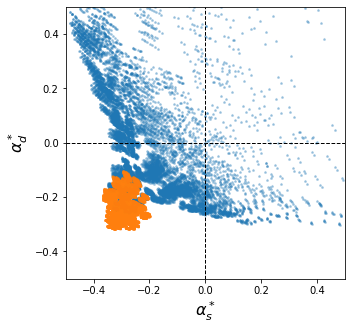

In [17]:
fig, ax = plt.subplots(figsize=(5,5))

cond = sm_df.f5==1

ax.scatter(sm_df.alpha_s_star[~cond], sm_df.alpha_d_star[~cond], s=5, c='C0', marker='*', alpha=0.3, label=r'w/o $(\mathbf{6},\mathbf{6})$ fermion')
ax.scatter(sm_df.alpha_s_star[cond], sm_df.alpha_d_star[cond], s=5, c='C1', marker='*', alpha=0.3, label=r'with $(\mathbf{6},\mathbf{6})$ fermion')

lim = 0.5
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)

ax.hlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)
ax.vlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)

ax.set_xlabel(r'$\alpha_s^*$', fontsize=16)
ax.set_ylabel(r'$\alpha_d^*$', fontsize=16)

# ax.legend()

# ax.fill_between([0,1], 0, 1, color='white',zorder=-100)
# ax.set_facecolor('lightgray')
# ax.text(0.03, -0.4, 'unphysical fixed points', fontsize=11, color='gray')

# fig.tight_layout()
# fig.savefig('../plots/sm_model_fp.pdf')

In [82]:
sm_df[(sm_df.A < 0) & (sm_df.D < 0) & (sm_df.f5 == 1)]

,f0,f1,f2,f3,f4,f5,f6,f7,s0,s1,s2,s3,s4,s5,s6,s7,alpha_s_star,alpha_d_star,A,D


In [79]:
27701/32768

84.5367431640625

Text(0, 0.5, '$\\alpha_d^*$')

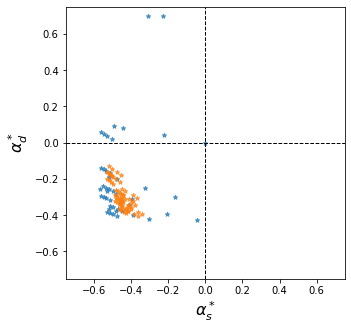

In [13]:
fig, ax = plt.subplots(figsize=(5,5))

cond = mssm_df.m5==1

ax.scatter(mssm_df.alpha_s_star[~cond], mssm_df.alpha_d_star[~cond], s=20, c='C0', marker='*', alpha=0.7, label=r'w/o $(\mathbf{6},\mathbf{6})$ multiplet')
ax.scatter(mssm_df.alpha_s_star[cond], mssm_df.alpha_d_star[cond], s=20, c='C1', marker='*', alpha=0.7, label=r'with $(\mathbf{6},\mathbf{6})$ multiplet')

lim = 0.75
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)

ax.hlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)
ax.vlines(0, -lim, lim, 'k', linestyle='--', linewidth=1)

ax.set_xlabel(r'$\alpha_s^*$', fontsize=16)
ax.set_ylabel(r'$\alpha_d^*$', fontsize=16)

# fig.tight_layout()
# fig.savefig('../plots/mssm_model_fp.pdf')

### zero-coupling streamplot (SUSY)

In [26]:
n_fermion = np.array([
    [0,1,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 1

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [27]:
X = np.linspace(0, 0.3, 100)
Y = np.linspace(0, 0.3, 100)
V = np.array([[MC.UV.betas((x,y)) for x in X] for y in Y])
V_X = V[...,0]
V_Y = V[...,1] 

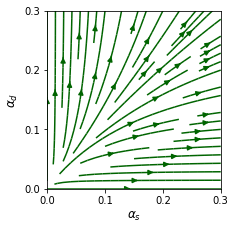

In [28]:
fig, ax = plt.subplots(figsize=(3.375, 3.3))
                       
ax.streamplot(X, Y, V_X, V_Y, color='darkgreen', density=0.75)

ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])

ax.set_xticks([0, 0.1, 0.2, 0.3])
ax.set_yticks([0, 0.1, 0.2, 0.3])

ax.set_xlabel(r'$\alpha_s$', fontsize=12)
ax.set_ylabel(r'$\alpha_d$', fontsize=12)

plt.tight_layout()
# plt.savefig('../plots/ZCFP_streamplot.pdf')

### strong running with a (6,6) multiplet

In [43]:
CMS16 = pd.read_csv('./data/alpha_s_CMS16.csv', names = ['mu', 'alpha_s'])
PDG19 = pd.read_csv('./data/alpha_s_PDG19.csv', names = ['mu', 'alpha_s'])

In [105]:
n_fermion = np.array([
    [0,6,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [106]:
alphas_UV = [0.3, 0.3]
EFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = EFT5_evol_s.y[0][-1]
EFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, cn.mu_UV)

UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e10)

In [107]:
n_multiplet = np.array([
    [0,0,2,0,0],
    [12,0,0,0,0],
    [0,0,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 1

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

In [47]:
SEFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = SEFT5_evol_s.y[0][-1]
SEFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, cn.MSUSY)
alpha_s_MSUSY = SEFT6_evol_s.y[0][-1]
SUSY_evol_s = SMC.SUSY.coupling_evolution((alpha_s_MSUSY, 0), cn.MSUSY, cn.mu_UV)

SUV_evol = SMC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e10)

In [127]:
L, M = MC.Lambda_dQCD_M(alphas_UV)
SL, SM = SMC.Lambda_dQCD_M(alphas_UV)

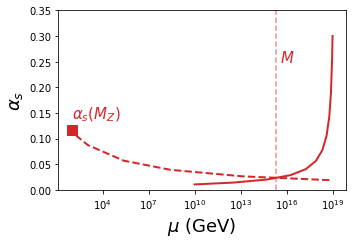

In [136]:
fig, ax = plt.subplots(figsize=(5,3.5))

# ax.scatter(CMS16.mu, CMS16.alpha_s, marker='s', alpha=0.1)
# ax.scatter(PDG19.mu, PDG19.alpha_s, marker='^', alpha=0.1)
ax.scatter(cn.MZ, cn.alpha_s_MZ, s=100 ,marker='s', color='C3')

# ax.plot(np.exp(SEFT5_evol_s.t), SEFT5_evol_s.y[0], 'r', linewidth=2)
# ax.plot(np.exp(SEFT6_evol_s.t), SEFT6_evol_s.y[0], 'r', linewidth=2)
# ax.plot(np.exp(SUSY_evol_s.t), SUSY_evol_s.y[0], 'r', linewidth=2)
# ax.plot(np.exp(SUV_evol.t), SUV_evol.y[0], 'r', linewidth=2)

ax.plot(np.exp(EFT5_evol_s.t), EFT5_evol_s.y[0], 'C3--', linewidth=2)
ax.plot(np.exp(EFT6_evol_s.t), EFT6_evol_s.y[0], 'C3--', linewidth=2)
ax.plot(np.exp(UV_evol.t), UV_evol.y[0], 'C3', linewidth=2)
# ax.plot(np.exp(UV_evol.t), UV_evol.y[1], 'C0', linewidth=2)

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0, 0.35)

ax.text(100, 0.14, r'$\alpha_s(M_Z)$', fontsize=15, color='C3')
ax.text(4e15, 0.25, r'$M$', fontsize=15, color='C3')
ax.vlines(M, 0, 0.4, 'C3', '--', alpha=0.5)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=18)
ax.set_ylabel(r'$\alpha_s$', fontsize=18)

plt.tight_layout()
plt.savefig('../plots/ray_talk/strong_running.pdf')

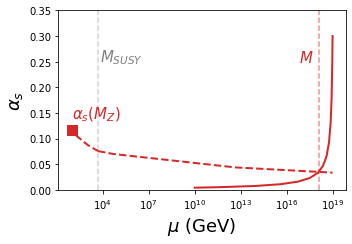

In [135]:
fig, ax = plt.subplots(figsize=(5,3.5))

# ax.scatter(CMS16.mu, CMS16.alpha_s, marker='s', alpha=0.1)
# ax.scatter(PDG19.mu, PDG19.alpha_s, marker='^', alpha=0.1)
ax.scatter(cn.MZ, cn.alpha_s_MZ, s=100 ,marker='s', color='C3')

ax.plot(np.exp(SEFT5_evol_s.t), SEFT5_evol_s.y[0], 'C3--', linewidth=2)
ax.plot(np.exp(SEFT6_evol_s.t), SEFT6_evol_s.y[0], 'C3--', linewidth=2)
ax.plot(np.exp(SUSY_evol_s.t), SUSY_evol_s.y[0], 'C3--', linewidth=2)
ax.plot(np.exp(SUV_evol.t), SUV_evol.y[0], 'C3', linewidth=2)

# ax.plot(np.exp(EFT5_evol_s.t), EFT5_evol_s.y[0], 'C3--', linewidth=2)
# ax.plot(np.exp(EFT6_evol_s.t), EFT6_evol_s.y[0], 'C3--', linewidth=2)
# ax.plot(np.exp(UV_evol.t), UV_evol.y[0], 'C3', linewidth=2)
# ax.plot(np.exp(UV_evol.t), UV_evol.y[1], 'C0', linewidth=2)

ax.vlines([cn.MSUSY], 0, 0.4, 'lightgray', '--')
ax.text(7e3, 0.25, r'$M_{SUSY}$', fontsize=15, color='gray')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0, 0.35)

ax.text(100, 0.14, r'$\alpha_s(M_Z)$', fontsize=15, color='C3')
ax.text(6e16, 0.25, r'$M$', fontsize=15, color='C3')
ax.vlines(SM, 0, 0.4, 'C3', '--', alpha=0.5)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=18)
ax.set_ylabel(r'$\alpha_s$', fontsize=18)

plt.tight_layout()
plt.savefig('../plots/ray_talk/SUSY_strong_running.pdf')

### epsilon_v for a model

In [6]:
n_multiplet = np.array([
    [0,0,4,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 4

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

(0.0, 0.3)

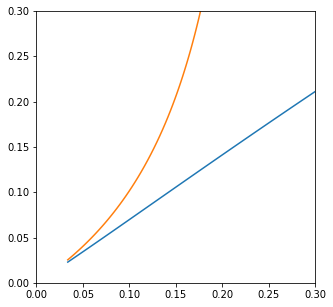

In [7]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(*SMC.alphas_UV_low.T)
ax.plot(*SMC.alphas_UV_high.T)

ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.3)

In [8]:
SEFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = SEFT5_evol_s.y[0][-1]
SEFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, cn.MSUSY)
alpha_s_MSUSY = SEFT6_evol_s.y[0][-1]
SUSY_evol_s = SMC.SUSY.coupling_evolution((alpha_s_MSUSY, 0), cn.MSUSY, cn.mu_UV)

alpha_s_min = SUSY_evol_s.y[0][-1]

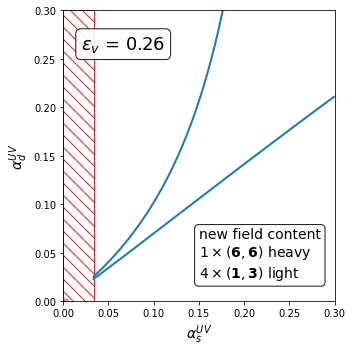

In [40]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [alpha_s_min, alpha_s_min], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)


ax.plot(*SMC.alphas_UV_low.T, L_colour, linewidth=2)
ax.plot(*SMC.alphas_UV_high.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {SMC.epsilon_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))

ax.text(0.15, 0.025, 'new field content\n' + r'$1\times(\mathbf{6},\mathbf{6})$ heavy' + '\n' + r'$4\times(\mathbf{1},\mathbf{3})$ light', fontsize=14, bbox=dict(fc='white', boxstyle='round', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)
    
plt.tight_layout()
plt.savefig('../plots/ray_talk/SUSY_eps_v.pdf')